# CASO PRÁCTICO

## Ejercicio 4

A partir de los siguientes resultados de un examen:

In [1]:
import numpy as np
import pandas as pd

edad = np.random.randint(15, 18, 10)
puntuacion = [3.25, 8.5, 7.75, np.nan, 9.80, 4, 6.5, np.nan, 8.70, 5.5]

* Crea un dataframe en donde el array edad tenga nombre de columna 'Edad' y, la lista puntuacion tenga el nombre 'Puntuacion'
* Sustituye los valores nulos por 0.
* Crea una nueva columna llamada Situacion, en donde tenga como valores 'PROMOCIONA' o 'REPITE' en función de si los valores de la columna 'Puntuacion' son mayores de 5 o no.
* Agrupa el nuevo dataframe por la media de la edad.
* Obtén el procentaje de aprobados y repetidores.
* Realiza un matriz de análisis gráfico.
* Obtén una matriz de correlación sobre los datos numéricos.


### SOLUCIÓN

Creamos un dataframe de odo similar a un diccionario de datos asignando los nombres de 'Edad' y 'Puntuacion'

In [2]:
df = pd.DataFrame({
    'Edad': edad, 
    'Puntuacion': puntuacion
})

df

,Edad,Puntuacion
0,16,3.25
1,16,8.50
2,15,7.75
3,17,NaN
4,15,9.80
5,17,4.00
6,16,6.50
7,15,NaN
8,17,8.70
9,15,5.50


Sustituimos los valores faltantes por cero.

In [3]:
df = df.fillna(0)

Existen métodos más eficientes para realizar if-else en un dataframe, pero por el momento, desarrollaremos una función que devuelva una lista de repetidores y aprobados.

In [4]:
def aprueba(target):
    
    promociona = []

    for item in target:
        if item <= 4.99:
            promociona.append('REPITE')
        else:
            promociona.append('PROMOCIONA')
            
    return promociona

In [5]:
df['Situacion'] = aprueba(target=list(df['Puntuacion']))

Agrupamos el dataframe por media de edad

In [6]:
df.groupby('Edad').mean()

,Puntuacion
Edad,
15,5.762500
16,6.083333
17,4.233333


Obtenemos el procentaje de aprobados y suspensos

In [7]:
print((pd.crosstab(index=df["Situacion"], columns="count"))/len(df) * 100)

col_0       count
Situacion        
PROMOCIONA   60.0
REPITE       40.0


Mostramos una matriz de análisis gráfico

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


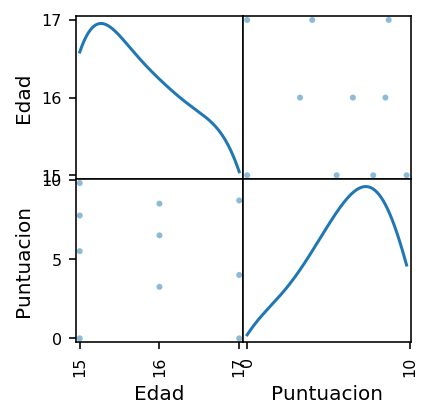

In [8]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (len(df.columns), 
                              len(df.columns)), 
               diagonal = 'kde');

Obtenemos la matriz de correlación

In [9]:
df.corr()

,Edad,Puntuacion
Edad,1.000000,-0.178457
Puntuacion,-0.178457,1.000000
